## Preparation

In [ ]:
import mordred as md
import numpy as np
import pandas as pd
from mordred import Autocorrelation, BaryszMatrix
from rdkit import Chem
from rdkit.Chem import AllChem, MolFromSmiles, MolToSmiles
from tqdm.auto import tqdm
from tqdm.contrib.concurrent import thread_map

from yellow_cards_workflow import BASE_DIR

### Loading molecules from METLIN-SMRT

In [ ]:
metlin_df = pd.read_csv(BASE_DIR/"data/input/SMRT_dataset.csv", sep=";")
metlin_df

<Axes: >

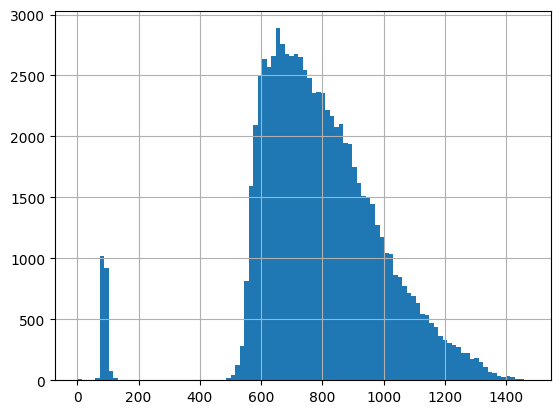

In [3]:
metlin_df["rt"].hist(bins=100)

In [ ]:
molecules = list(map(Chem.MolFromInchi, tqdm(metlin_df["inchi"].to_numpy())))
print(len(molecules))
molecules_valid_mask = [True if x is not None else False for x in molecules]
print(np.count_nonzero(molecules_valid_mask))

  0%|          | 0/80038 [00:00<?, ?it/s]

[14:44:10] Explicit valence for atom # 14 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 14 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 16 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 16 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 16 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 16 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 18 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 17 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 17 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 15 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 15 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 16 N, 4, is greater than 

In [ ]:
molecules_valid = np.array(molecules)[molecules_valid_mask]
len(molecules_valid)

79957

In [ ]:
smiles_valid = list(map(Chem.MolToSmiles, tqdm(molecules_valid)))
len(smiles_valid)

  0%|          | 0/79957 [00:00<?, ?it/s]

79957

In [ ]:
import re

In [ ]:
inchi_valid = list(map(Chem.inchi.MolToInchi, tqdm(molecules_valid)))

  0%|          | 0/79957 [00:00<?, ?it/s]

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Proton(s) added/removed

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Proton(s) added/removed; Omitted undefined stereo

[16:33:20] WARNING: Omitted undefined stereo

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges 

In [ ]:
inchi_pattern = re.compile(
    r"(InChI=1S/[\w]+/[\w\d\-\(\)\,]+/h[\w\d\,\(\)\-]+)/{0,1}.*")


def truncate_inchi(inchi):
    if inchi is not None:
        match = re.match(inchi_pattern, inchi)
        if match:
            return match[1]
        else:
            return None
    else:
        return None

In [ ]:
truncated_inchi = list(map(truncate_inchi, tqdm(inchi_valid)))

  0%|          | 0/79957 [00:00<?, ?it/s]

In [ ]:
unique_truncated_inchi, unique_inchi_idx = np.unique(truncated_inchi, return_index=True)
len(unique_truncated_inchi), None in unique_truncated_inchi

(79890, False)

In [ ]:
smiles_unique, index_unique = np.unique(smiles_valid, return_index=True)
len(smiles_unique)

79938

In [ ]:
# np.savetxt(BASE_DIR/"data/processed/smiles_unique.txt",smiles_unique,"%s")

In [ ]:
inchi_unique = np.array(inchi_valid)[unique_inchi_idx]
smiles_unique = np.array(smiles_valid)[unique_inchi_idx]

In [ ]:
molecules_unique = molecules_valid[unique_inchi_idx]
len(molecules_unique)

79890

## Using Autocorrelation Descriptors from Mordred

In [22]:
md_autocorr_calc = md.Calculator(Autocorrelation)

In [23]:
md_autocorr_calc.descriptors

(mordred.Autocorrelation.ATS(0, 'dv'),
 mordred.Autocorrelation.ATS(1, 'dv'),
 mordred.Autocorrelation.ATS(2, 'dv'),
 mordred.Autocorrelation.ATS(3, 'dv'),
 mordred.Autocorrelation.ATS(4, 'dv'),
 mordred.Autocorrelation.ATS(5, 'dv'),
 mordred.Autocorrelation.ATS(6, 'dv'),
 mordred.Autocorrelation.ATS(7, 'dv'),
 mordred.Autocorrelation.ATS(8, 'dv'),
 mordred.Autocorrelation.ATS(0, 'd'),
 mordred.Autocorrelation.ATS(1, 'd'),
 mordred.Autocorrelation.ATS(2, 'd'),
 mordred.Autocorrelation.ATS(3, 'd'),
 mordred.Autocorrelation.ATS(4, 'd'),
 mordred.Autocorrelation.ATS(5, 'd'),
 mordred.Autocorrelation.ATS(6, 'd'),
 mordred.Autocorrelation.ATS(7, 'd'),
 mordred.Autocorrelation.ATS(8, 'd'),
 mordred.Autocorrelation.ATS(0, 's'),
 mordred.Autocorrelation.ATS(1, 's'),
 mordred.Autocorrelation.ATS(2, 's'),
 mordred.Autocorrelation.ATS(3, 's'),
 mordred.Autocorrelation.ATS(4, 's'),
 mordred.Autocorrelation.ATS(5, 's'),
 mordred.Autocorrelation.ATS(6, 's'),
 mordred.Autocorrelation.ATS(7, 's'),
 mo

In [24]:
descriptors_md_autocorr_unique_df = md_autocorr_calc.pandas(molecules_unique,ipynb=True)


  0%|          | 0/79890 [00:00<?, ?it/s]

In [ ]:
descriptors_md_autocorr_unique_df.insert(0,"smiles",smiles_unique)
descriptors_md_autocorr_unique_df.insert(0,"inchi",inchi_unique)
descriptors_md_autocorr_unique_df

In [26]:
descriptors_md_autocorr_unique_df.to_csv(BASE_DIR/"data/processed/descriptors_autocorr_unique.csv",sep=";")

## Merging Autocorrelation Descriptors with Random Coefficients

In [ ]:
ds_auto_df = pd.read_csv(
    BASE_DIR/"data/processed/descriptors_autocorr_unique.csv", sep=";", index_col=0, low_memory=False)
ds_auto_df

In [4]:
clean_ds_auto = ds_auto_df.loc[:,ds_auto_df.dtypes==float]
clean_ds_auto.insert(0,"smiles",ds_auto_df["smiles"])
clean_ds_auto.insert(0,"inchi",ds_auto_df["inchi"])

In [ ]:
clean_ds_auto

In [29]:
np.save(BASE_DIR/"data/processed/autocorr-descriptors.npy",clean_ds_auto.columns[2:].to_numpy(dtype=str),allow_pickle=False)
clean_ds_auto.columns[2:].to_list()

['ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0s',
 'ATS1s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6are',
 'ATS7are',
 'ATS8are',
 'ATS0p',
 'ATS1p',
 'ATS2p',
 'ATS3p',
 'ATS4p',
 'ATS5p',
 'ATS6p',
 'ATS7p',
 'ATS8p',
 'ATS0i',
 'ATS1i',
 'ATS2i',
 'ATS3i',
 'ATS4i',
 'ATS

In [6]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_ds_auto = pd.DataFrame(scaler.fit_transform(clean_ds_auto.drop(columns=["smiles", "inchi"])))
scaled_ds_auto.insert(0,"smiles", clean_ds_auto["smiles"])
scaled_ds_auto.insert(0,"inchi", clean_ds_auto["inchi"])
scaled_ds_auto

In [30]:
np.save(BASE_DIR/"data/processed/autocorr-synthetic-mean.npy", scaler.mean_)
np.save(BASE_DIR/"data/processed/autocorr-synthetic-scale.npy", scaler.scale_)

<Axes: >

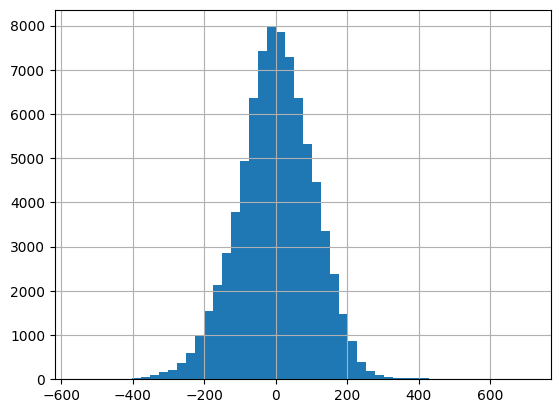

In [31]:
scaled_ds_auto.drop(columns=["smiles","inchi"]).sum(axis=1).hist(bins=50)

In [33]:
scaled_ds_auto.to_csv(BASE_DIR/"data/processed/descriptors_autocorr_clean_scaled.csv",sep=";")

<Axes: >

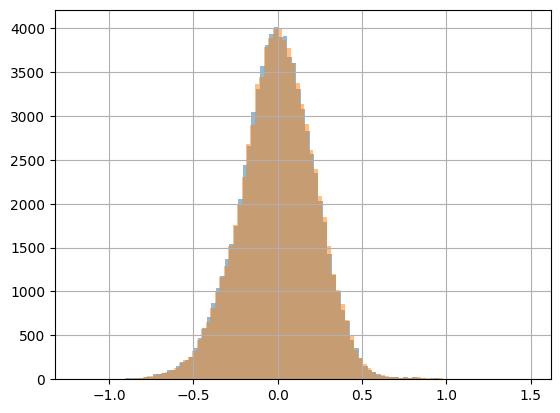

In [9]:
rng = np.random.default_rng(seed=42)
random_coeffs = rng.random(len(scaled_ds_auto.columns)-2)
mix_ds = random_coeffs*scaled_ds_auto.drop(columns=["smiles","inchi"])/np.sum(random_coeffs)
mix_ds = mix_ds.sum(axis=1)

out_df = pd.DataFrame()
out_df["smiles"] = scaled_ds_auto["smiles"].to_numpy()
out_df["inchi"] = scaled_ds_auto["inchi"].to_numpy()
out_df["values"] = mix_ds.to_numpy()
out_df.to_csv(BASE_DIR/"data/processed/synthetic-clean-dataset.csv",sep=";")

noise = rng.normal(0,0.015,len(mix_ds))
mix_ds.hist(bins=100, alpha=0.5)
mix_ds += noise
mix_ds.hist(bins=100, alpha=0.5)

In [37]:
import matplotlib.pyplot as plt

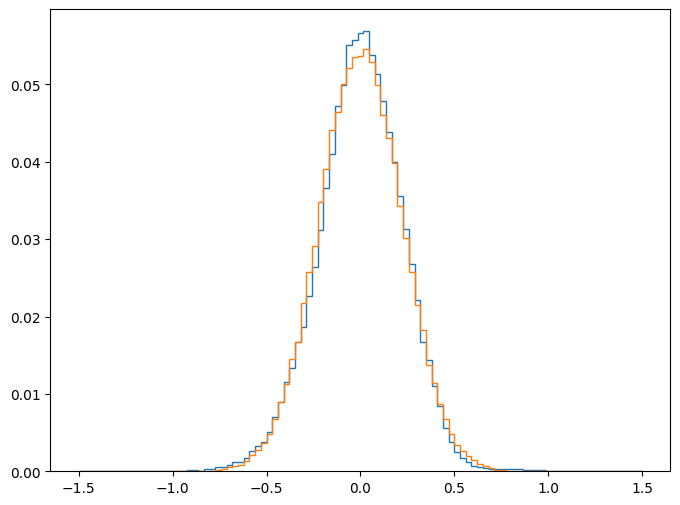

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=100)
bins = np.linspace(-1.5,1.5,100)
plt.stairs(values=np.histogram(mix_ds, bins = bins)[0]/len(mix_ds),edges=bins)
plt.stairs(values=np.histogram(rng.normal(0,1/4.5,len(mix_ds)), bins = bins)[0]/len(mix_ds),edges=bins)

In [ ]:
mix_df = pd.DataFrame()
mix_df["smiles"] = scaled_ds_auto["smiles"].to_numpy()
mix_df["inchi"] = scaled_ds_auto["inchi"].to_numpy()
mix_df["values"] = mix_ds.to_numpy()
mix_df

In [82]:
mix_df.to_csv(BASE_DIR/"data/processed/synthetic-dataset.csv", sep=";")

## Shuffled Dataset

In [ ]:
synth_df = pd.read_csv(BASE_DIR/"data/processed/synthetic-dataset.csv", index_col=0, sep = ";")
synth_df

In [ ]:
for i in [0.5, 1, 2.5, 5, 10]:
    rng = np.random.default_rng(seed=42)
    new_synth_df = synth_df.copy(deep=True)
    shuffle_idx = rng.choice(
        len(synth_df), size=int((i / 100) * len(synth_df)), replace=False, shuffle=True
    )
    new_synth_df.iloc[sorted(shuffle_idx), 2] = synth_df.iloc[shuffle_idx, 2]
    new_synth_df.to_csv(BASE_DIR / f"data/processed/synthetic-shuffle-{i}.csv", sep=";")

## Variable Addition

In [ ]:
synth_df = pd.read_csv(BASE_DIR/"data/processed/synthetic-dataset.csv", index_col=0, sep = ";")
synth_df

In [ ]:
for i in [0.5, 1, 2.5, 5, 10]:
    for delta in [
        0.001,
        0.0025,
        0.005,
        0.01,
        0.025,
        0.030,
        0.035,
        0.040,
        0.045,
        0.05,
        0.055,
        0.060,
        0.065,
        0.070,
        0.075,
        0.080,
        0.085,
        0.090,
        0.095,
        0.1,
        0.125,
        0.15,
        0.175,
        0.2,
        0.25,
    ]:
        rng = np.random.default_rng(seed=42)
        new_mix_df = synth_df.copy(deep=True)
        mod_idx = rng.choice(
            len(synth_df),
            size=int((i / 100) * len(synth_df)),
            replace=False,
            shuffle=False,
        )
        new_mix_df.iloc[mod_idx, 2] = new_mix_df.iloc[mod_idx, 2] + delta
        new_mix_df.to_csv(
            BASE_DIR / f"data/processed/synthetic-variable-mu-{delta}-{i}.csv", sep=";"
        )